# Dragonfly/RGB Setup

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/Rocks

/content/gdrive/MyDrive/Rocks


In [ ]:
import os
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_float
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.segmentation import mark_boundaries
from skimage.segmentation import find_boundaries

dirR = os.listdir("files_for_advik/giri_downsampled/625nm")
dirG = os.listdir("files_for_advik/giri_downsampled/530nm")
dirB = os.listdir("files_for_advik/giri_downsampled/470nm")
dirUV = os.listdir("files_for_advik/giri_downsampled/365nm")


In [ ]:
from sklearn.semi_supervised import LabelPropagation
from sklearn import svm
from sklearn.model_selection import train_test_split
from skimage.segmentation import slic
from pycocotools.coco import COCO
import json


#Making arrays of ordered image points, dictionaries of images
rArr = np.empty([len(dirR)], dtype=object)
gArr = np.empty([len(dirG)], dtype=object)
bArr = np.empty([len(dirB)], dtype=object)
uvArr = np.empty([len(dirUV)], dtype=object)

rDict = {}
gDict = {}
bDict = {}
uvDict = {}

rSeq = []
gSeq = []
bSeq = []
uvSeq = []

#Adding directory image files
for i, image in enumerate(dirR):
  try:
    substr = int(image[10:15])
  except:
    try:
      substr = int(image[9:14])
    except:
      try:
        substr = int(image[8:13])
      except:
        substr = int(image[7:12])
  rArr[i] = substr
  rDict[substr] = [i, image]

for i, image in enumerate(dirG):
  try:
    substr = int(image[10:15])
  except:
    try:
      substr = int(image[9:14])
    except:
      try:
        substr = int(image[8:13])
      except:
        substr = int(image[7:12])
  gArr[i] = substr
  gDict[substr] = [i, image]

for i, image in enumerate(dirB):
  try:
    substr = int(image[10:15])
  except:
    try:
      substr = int(image[9:14])
    except:
      try:
        substr = int(image[8:13])
      except:
        try:
          substr = int(image[7:12])
        except:
          substr = int(image[6:11])
  bArr[i] = substr
  bDict[substr] = [i, image]

for i, image in enumerate(dirUV):
  try:
    substr = int(image[10:15])
  except:
    try:
      substr = int(image[9:14])
    except:
      try:
        substr = int(image[8:13])
      except:
        try:
          substr = int(image[7:12])
        except:
          substr = int(image[6:11])
  uvArr[i] = substr
  uvDict[substr] = [i, image]


# Sorting
rArr = np.unique(np.sort(rArr, axis=0))[2:]
gArr = np.sort(gArr, axis=0)
bArr = np.sort(bArr, axis=0)
uvArr = np.sort(uvArr, axis=0)


for i, img in enumerate(rArr):
  rDict[img][0] = i

for i, img in enumerate(gArr):
  gDict[img][0] = i

for i, img in enumerate(bArr):
  bDict[img][0] = i

for i, img in enumerate(uvArr):
  uvDict[img][0] = i


In [ ]:
# Function for rgb image index finding - takes UV range as parameter
def rgbAlign(firstImg, lastImg):
  uvInd1 = uvDict[firstImg][0]
  uvInd2 = uvDict[lastImg][0] + 1
  bInd1 = bDict[firstImg + 1][0]
  bInd2 = bDict[lastImg + 1][0] + 1
  gInd1 = gDict[firstImg + 2][0]
  gInd2 = gDict[lastImg + 2][0] + 1
  rInd1 = rDict[firstImg + 3][0]
  rInd2 = rDict[lastImg + 3][0] + 1

  uvInds = np.arange(uvInd1, uvInd2, 1)
  bInds = np.arange(bInd1, bInd2, 1)
  gInds = np.arange(gInd1, gInd2, 1)
  rInds = np.arange(rInd1, rInd2, 1)

  return rInds, gInds, bInds, uvInds

In [ ]:
# rArr/gArr is a sequential array of the RGB image keys
# rDict has the key of the RGB image keys, contains the official image name and rArr index


# Boolean array saying which specimens are present for every image
isSpecimen = np.full((len(uvArr), 10), False)

zRange = np.empty([10, 2], dtype=int)
zRange[0] = [39876, 41437]
zRange[1] = [40097, 41647]
zRange[2] = [34751, 35316]
zRange[3] = [35131, 36436]
zRange[4] = [39251, 40467]
zRange[5] = [38061, 39886]
zRange[6] = [37836, 40467]
zRange[7] = [41062, 41952]
zRange[8] = [40762, 41727]
zRange[9] = [34116, 34976]

directs = np.empty([10], dtype=object)
directs[0] = "spec1_pyrite"
directs[1] = "spec2"
directs[2] = "spec3_pyrite"
directs[3] = "spec4_pyrite"
directs[4] = "spec5"
directs[5] = "spec6_pyrite"
directs[6] = "spec7"
directs[7] = "spec9_pyrite"
directs[8] = "spec10_pyrite"
directs[9] = "spec11_pyrite"


substrRange = np.empty([10], dtype=int)
substrRange[0] = 12
substrRange[1] = 5
substrRange[2] = 12
substrRange[3] = 12
substrRange[4] = 5
substrRange[5] = 12
substrRange[6] = 5
substrRange[7] = 12
substrRange[8] = 13
substrRange[9] = 13


xRange = np.empty([10, 2], dtype=int)
xRange[0] = [4564, 7619]
xRange[1] = [1324, 5516]
xRange[2] = [0, 4192]
xRange[3] = [888, 4067]
xRange[4] = [1168, 4269]
xRange[5] = [1464, 4145]
xRange[6] = [2305, 7588]
xRange[7] = [4923, 7292]
xRange[8] = [3754, 6233]
xRange[9] = [1511, 4799]

yRange = np.empty([10, 2], dtype=int)
yRange[0] = [0, 3549]
yRange[1] = [0, 3409]
yRange[2] = [0, 3736]
yRange[3] = [3922, 7285]
yRange[4] = [3268, 6164]
yRange[5] = [1836, 7363]
yRange[6] = [3299, 7269]
yRange[7] = [2023, 4343]
yRange[8] = [1229, 4125]
yRange[9] = [3735, 6600]





for i in range(len(uvArr)):
  img = uvArr[i]
  for j in range(10):
    if img >= zRange[j, 0] and img <= zRange[j, 1]:
      isSpecimen[i, j] = True









# Coco Setup

In [ ]:
# Takes in a COCO annotation file, image, and image ID: outputs an array containing the locations of pixels
def findAnns(annFile, id):
    coco = COCO(annFile)
    img = coco.imgs[id]
    catId = coco.getCatIds()
    annsId = coco.getAnnIds(imgIds=img['id'], catIds=catId, iscrowd=None)
    annsTemp = coco.loadAnns(annsId)

    annsArr = np.zeros((img['height'], img['width']))

    for ann in annsTemp:
        annsArr = np.maximum(annsArr, coco.annToMask(ann)*ann['category_id'])

    return annsArr



In [ ]:
#Loading annotations/images
#trainAnns1 = findAnns("Annotations/1654.json", 6)
trainAnns2 = findAnns("Annotations/1755.json", 7)

#trainAnns1[trainAnns1 == 8] = 1.0
trainAnns2[trainAnns2 == 8] = 1.0

#trainImg1 = img_as_float(io.imread("Images/1654.jpg"))
trainImg2 = img_as_float(io.imread("Images/1755.jpg"))

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


# Coco Segmentation

In [ ]:
# Takes in an image and various parameters, outputs a SLIC image segmentation
def rgbSegment(image, sig, compact, numSegs):
  segment = np.array(slic(image, sigma = sig, compactness = compact, channel_axis=None, n_segments=numSegs))
  return segment

In [ ]:
#gSegment1 = rgbSegment(trainImg1[:, :, 1], 15, 0.001, 500)
#bSegment1 = rgbSegment(trainImg1[:, :, 2], 15, 0.001, 500)

gSegment2 = rgbSegment(trainImg2[:, :, 1], 15, 0.001, 500)
bSegment2 = rgbSegment(trainImg2[:, :, 2], 15, 0.001, 500)

#gSegment3 = rgbSegment(trainImg3[:, :, 1], 15, 0.001, 100)
#bSegment3 = rgbSegment(trainImg3[:, :, 2], 15, 0.001, 100)

In [ ]:
# Takes in an image, its superpixel segmentations and annotations:
# outputs an array of the R, G, B, and "Annotation Confidence" averages for each superpixel
def rgbCocoProcess(image, anns, segment):
  numSegs = np.amax(segment)

  rgbArr = np.empty([numSegs, 4])

  for i in range(numSegs):
      sup = np.where(segment == i + 1)

      rAvg = np.mean(image[sup[0], sup[1], 0])
      gAvg = np.mean(image[sup[0], sup[1], 1])
      bAvg = np.mean(image[sup[0], sup[1], 2])
      segAvg = np.mean(anns[sup[0], sup[1]])

      rgbArr[i] = [rAvg, gAvg, bAvg, segAvg]

  return rgbArr

In [ ]:
#gProcess1 = rgbCocoProcess(trainImg1, trainAnns1, gSegment1)
gProcess2 = rgbCocoProcess(trainImg2, trainAnns2, gSegment2)
#gProcess3 = rgbCocoProcess(trainImg3, trainAnns3, gSegment3)

#bProcess1 = rgbCocoProcess(trainImg1, trainAnns1, bSegment1)
bProcess2 = rgbCocoProcess(trainImg2, trainAnns2, bSegment2)
#bProcess3 = rgbCocoProcess(trainImg3, trainAnns3, bSegment3)

In [ ]:
# Removing any positive instances - we only train with COCO to negative
#gNegative1 = np.delete(gProcess1, np.where(gProcess1[:, 3] != 0.0)[0], 0)
gNegative2 = np.delete(gProcess2, np.where(gProcess2[:, 3] != 0.0)[0], 0)
#gNegative3 = np.delete(gProcess3, np.where(gProcess3[:, 3] != 0.0)[0], 0)

#bNegative1 = np.delete(bProcess1, np.where(bProcess1[:, 3] != 0.0)[0], 0)
bNegative2 = np.delete(bProcess2, np.where(bProcess2[:, 3] != 0.0)[0], 0)
#bNegative3 = np.delete(bProcess3, np.where(bProcess3[:, 3] != 0.0)[0], 0)

In [ ]:
#gNew1 = np.copy(gNegative1)
#gNew1[gNew1[:, 3] != 0.0] = 1

gNew2 = np.copy(gNegative2)
gNew2[gNew2[:, 3] != 0.0] = 1

#bNew1 = np.copy(bNegative1)
#bNew1[bNew1[:, 3] != 0.0] = 1

bNew2 = np.copy(bNegative2)
bNew2[bNew2[:, 3] != 0.0] = 1

# Dragonfly Segmentation

In [ ]:
# Returns R values for each pixel in a GIRI downsampled image, with given image key
def rVals(imgKey):
  rImg = img_as_float(io.imread("files_for_advik/giri_downsampled/625nm/" + rDict[imgKey+3][1]))
  return rImg

# Returns G values for each pixel in a GIRI downsampled image, with given image key
def gVals(imgKey):
  gImg = img_as_float(io.imread("files_for_advik/giri_downsampled/530nm/" + gDict[imgKey+2][1]))
  return gImg

# Returns B values for each pixel in a GIRI downsampled image, with given image key
def bVals(imgKey):
  bImg = img_as_float(io.imread("files_for_advik/giri_downsampled/470nm/" + bDict[imgKey+1][1]))
  return bImg

In [ ]:
# Given a GIRI image with a given key
# Returns an array of which pixels contain Dragonfly pyrite annotations
def getLabels(imgKey):
  keyIndex = rgbAlign(imgKey, imgKey)
  newLabels = np.zeros([1544, 1595], dtype=int)

  # Iterating over each specimen
  for i in range(10):
    if isSpecimen[keyIndex[3][0], i]:

      template = np.zeros([7762, 8019])
      dirString = "files_for_advik/siberia_binaries/" + directs[i]
      dir = os.listdir(dirString)
      rgbIndices = rgbAlign(zRange[i, 0], zRange[i, 1])

      for image in dir:
        substr = int(image[substrRange[i]:substrRange[i]+3]) - 1

        try:
          if(rgbIndices[0][substr] == keyIndex[3][0]):
            template[yRange[i, 0]:yRange[i, 1], xRange[i, 0]:xRange[i, 1]] = img_as_float(io.imread(dirString + "/" + image))
            break
        except:
          continue

      template = resize(template, (1544, 1595))
      template[template != 0.0] = 1.0
      template = template.astype(int)
      newLabels = newLabels + template


  return newLabels



In [ ]:
# Given a segmentation of an image, and the RGB pixel values
# Outputs the RGB averages for each superpixel
def rgbProcess(segment, rImg, gImg, bImg):
  numSegs = np.amax(segment)
  rgbArr = np.empty([numSegs, 3])

  for i in range(numSegs):
    sup = np.where(segment == i + 1)
    rAvg = np.mean(rImg[sup[0], sup[1]])
    gAvg = np.mean(gImg[sup[0], sup[1]])
    bAvg = np.mean(bImg[sup[0], sup[1]])
    rgbArr[i] = [rAvg, gAvg, bAvg]

  return rgbArr


# Given a segmentation of an image, and the Dragonfly annotations
# Outputs the annotation labels for those superpixels which overlap with Dragonfly
def labelProcess(segment, labels):
  numSegs = np.amax(segment)
  target = np.zeros([numSegs], dtype=int)

  for i in range(numSegs):
    sup = np.where(segment == i + 1)
    avgAnn = np.mean(labels[sup[0], sup[1]])
    if avgAnn > 0.9:
      #print(avgAnn)
      target[i] = 1

  return target

In [ ]:
# Given a segmentation of an image, and the RGB pixel values
# Outputs the RGB averages for each superpixel
def rgbTestProcess(segment, img):
  numSegs = np.amax(segment)
  rgbArr = np.empty([numSegs, 3])

  for i in range(numSegs):
    sup = np.where(segment == i + 1)
    rAvg = np.mean(img[sup[0], sup[1], 0])
    gAvg = np.mean(img[sup[0], sup[1], 1])
    bAvg = np.mean(img[sup[0], sup[1], 2])
    rgbArr[i] = [rAvg, gAvg, bAvg]

  return rgbArr

In [ ]:
# Takes in the predicted superpixel confidence levels and an XY segmentation
# Outputs the confidence level for each individual pixel
def pixelate(pred, segment):
  pixelArr = np.empty([1544, 1595])

  for i in range(np.amax(segment)):
    ind = np.where(segment == i + 1)

    pixelArr[ind[0], ind[1]] = pred[i]

  return pixelArr

In [ ]:
imgSamples = np.arange(0, 2561, 50)

[   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350
 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050
 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550]


In [ ]:
print(uvArr[imgSamples[2]])

31271


In [ ]:
# Testing with a given horizontal image on the stack
#xTrain = gNegative1[:, :3]
#yTrain = gNegative1[:, 3]

#imgKeys = [39886, 41967, 43078, 39251, 40092, 35131, 41647, 37836, 41727, 34116, 41952]
imgKeys = [39886, 41967, 43078]


for ind in imgSamples:
  try:
    rImg = rVals(uvArr[ind])
    gImg = gVals(uvArr[ind])
    bImg = bVals(uvArr[ind])
    labels = getLabels(uvArr[ind])

    gSegment = rgbSegment(gImg, 15, 0.001, 1000)
    bSegment = rgbSegment(bImg, 15, 0.001, 1000)

    gTempTrain = rgbProcess(gSegment, rImg, gImg, bImg)
    gTempTarget = labelProcess(gSegment, labels)

    bTempTrain = rgbProcess(bSegment, rImg, gImg, bImg)
    bTempTarget = labelProcess(bSegment, labels)

    gTrain = np.delete(gTempTrain, np.where(gTempTarget == 0)[0], 0)
    gTarget = np.delete(gTempTarget, np.where(gTempTarget == 0)[0], 0)

    bTrain = np.delete(bTempTrain, np.where(bTempTarget == 0)[0], 0)
    bTarget = np.delete(bTempTarget, np.where(bTempTarget == 0)[0], 0)

    xTrain = np.concatenate((xTrain, gTrain, bTrain))
    yTrain = np.concatenate((yTrain, gTarget, bTarget))
    print("Reached: " + str(uvArr[ind]))
  except:
    continue



Reached: 30770
Reached: 31021
Reached: 31271
Reached: 31771
Reached: 32021
Reached: 32271
Reached: 32521
Reached: 32771
Reached: 33021
Reached: 33271
Reached: 33521
Reached: 33771
Reached: 34021
Reached: 34271
Reached: 34521
Reached: 34771
Reached: 35021
Reached: 35271
Reached: 35526
Reached: 35776
Reached: 36026
Reached: 36276
Reached: 36531
Reached: 36781
Reached: 37031
Reached: 37281
Reached: 37531
Reached: 37781
Reached: 38031
Reached: 38281
Reached: 38541
Reached: 38796
Reached: 39046
Reached: 39296
Reached: 39546
Reached: 39796
Reached: 40052
Reached: 40302
Reached: 40552
Reached: 40802
Reached: 41052
Reached: 41302
Reached: 41552
Reached: 41802
Reached: 42052
Reached: 42302
Reached: 42558
Reached: 42813
Reached: 43063
Reached: 43313
Reached: 43563


In [ ]:
from numpy import savetxt

savetxt('DragonflyRGBTest.csv', xTrain, delimiter=',')
savetxt('DragonflyLabelTest.csv', yTrain, delimiter=',')

In [ ]:
import pandas as pd
xPand = np.array(pd.read_csv('DragonflyRGBTest.csv', sep=',', header=None))
yPand = np.array(pd.read_csv('DragonflyLabelTest.csv', sep=',', header=None))

xTrain = xPand[yPand[:, 0] == 1.0]
yTrain = yPand[yPand[:, 0] == 1.0]


# Training

In [ ]:
import pandas as pd
xPand = np.array(pd.read_csv('DragonflyRGBTest.csv', sep=',', header=None))
yPand = np.array(pd.read_csv('DragonflyLabelTest.csv', sep=',', header=None))

xTrain = xPand[yPand[:, 0] == 1.0]
yTrain = yPand[yPand[:, 0] == 1.0]


In [ ]:
#newXTrain = np.concatenate((xTrain, gNegative1[:, :3], gNegative2[:, :3], bNegative1[:, :3], bNegative2[:, :3]))
#newYTrain = np.concatenate((yTrain, gNegative1[:, 3], gNegative2[:, 3], bNegative1[:, 3], bNegative2[:, 3]))

newXTrain = np.concatenate((xTrain, gNew2[:, :3], bNew2[:, :3]))
newYTrain = np.concatenate((yTrain[:, 0], gNew2[:, 3], bNew2[:, 3]))

In [ ]:
model = svm.SVC()
model.fit(newXTrain, newYTrain)

SVC()

# Testing Setup


In [ ]:
# Processing test images
fullStack = np.zeros((50, 1544, 1595, 3))

for i in range(50):
  num = 1652 + i
  testImg = img_as_float(io.imread("files_for_advik/giri_downsampled/rgbs/" + str(num) + ".jpg"))
  fullStack[i] = testImg
  print(num)

#fullStack = np.stack((testImg, testImg1, testImg2, testImg3, testImg4, testImg5))

1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701


In [ ]:
#Array setup for testing
x = np.size(fullStack, 1)
y = np.size(fullStack, 2)
z = np.size(fullStack, 0)

xy = np.zeros([50, 1544, 1595])
yz = np.zeros([50, 1544, 1595])
xz = np.zeros([50, 1544, 1595])

# Vertical slicing spacing
slicedStack = fullStack[:, ::9, ::9, :]

yzSliced = np.zeros([50, 172, 178])
xzSliced = np.zeros([50, 172, 178])

In [ ]:
# Takes in the predicted superpixel confidence levels and the original segmentation
# Outputs the confidence level for each individual pixel
def pixelateYZ(pred, segment):
    pixelArr = np.empty([50, 178])

    for i in range(np.amax(segment)):
        ind = np.where(segment == i + 1)

        pixelArr[ind[0], ind[1]] = pred[i]

    return pixelArr

def pixelateXZ(pred, segment):
    pixelArr = np.empty([50, 172])

    for i in range(np.amax(segment)):
        ind = np.where(segment == i + 1)

        pixelArr[ind[0], ind[1]] = pred[i]

    return pixelArr

# Testing

In [ ]:
# Testing on horizontal (XY) slices
for i in range(1):
    # Segmenting on the green channel
    #rSegment = rgbSegment(fullStack[i+2, :, :, 0], 15, 0.001, 30000)
    gSegment = rgbSegment(fullStack[i+2, :, :, 1], 15, 0.001, 30000)
    bSegment = rgbSegment(fullStack[i+2, :, :, 2], 15, 0.001, 30000)
    #rTest = rgbTestProcess(rSegment, fullStack[i+2])
    gTest = rgbTestProcess(gSegment, fullStack[i+2])
    bTest = rgbTestProcess(bSegment, fullStack[i+2])

    # Model prediction
    #rPred = model.predict(rTest)
    gPred = model.predict(gTest)
    bPred = model.predict(bTest)

    #Pixel evaluation
    #xy[i+2] = (pixelate(rPred, rSegment) + pixelate(gPred, gSegment) + pixelate(bPred, bSegment)) / 3.0
    xy[i+2] = (pixelate(gPred, gSegment) + pixelate(bPred, bSegment)) / 3.0
    print("Evaluated Z = " + str(i+2))



Evaluated Z = 2


In [ ]:
# Testing on vertical (YZ) slices
for i in range(172):
    rSegment = rgbSegment(slicedStack[:, i, :, 0], 15, 0.001, 1000)
    gSegment = rgbSegment(slicedStack[:, i, :, 1], 15, 0.001, 1000)
    bSegment = rgbSegment(slicedStack[:, i, :, 2], 15, 0.001, 1000)

    rTest = rgbTestProcess(rSegment, slicedStack[:, i])
    gTest = rgbTestProcess(gSegment, slicedStack[:, i])
    bTest = rgbTestProcess(bSegment, slicedStack[:, i])

    # Model training
    rPred = model.predict(rTest)
    gPred = model.predict(gTest)
    bPred = model.predict(bTest)

    #Pixel evaluation
    rPredPix = pixelateYZ(rPred, rSegment)
    gPredPix = pixelateYZ(gPred, gSegment)
    bPredPix = pixelateYZ(bPred, bSegment)
    avgPredPix = (rPredPix + gPredPix + bPredPix) / 3.0

    yzSliced[:, i] = avgPredPix
    if(i % 50 == 0):
        print("Evaluated X = " + str(i))

Evaluated X = 0
Evaluated X = 50
Evaluated X = 100
Evaluated X = 150


In [ ]:
# Testing on vertical (XZ) slices
for i in range(178):
    rSegment = rgbSegment(slicedStack[:, :, i, 0], 15, 0.001, 1000)
    gSegment = rgbSegment(slicedStack[:, :, i, 1], 15, 0.001, 1000)
    bSegment = rgbSegment(slicedStack[:, :, i, 2], 15, 0.001, 1000)

    rTest = rgbTestProcess(rSegment, slicedStack[:, :, i])
    gTest = rgbTestProcess(gSegment, slicedStack[:, :, i])
    bTest = rgbTestProcess(bSegment, slicedStack[:, :, i])

    # Model training
    rPred = model.predict(rTest[:, 0:6])
    gPred = model.predict(gTest[:, 0:6])
    bPred = model.predict(bTest[:, 0:6])

    #Pixel evaluation
    rPredPix = pixelateXZ(rPred, rSegment)
    gPredPix = pixelateXZ(gPred, gSegment)
    bPredPix = pixelateXZ(bPred, bSegment)
    avgPredPix = (rPredPix + gPredPix + bPredPix) / 3.0

    xzSliced[:, :, i] = avgPredPix
    if(i % 50 == 0):
        print("Evaluated X = " + str(i))

Evaluated X = 0
Evaluated X = 50
Evaluated X = 100
Evaluated X = 150


# Interpolation/Pixel Processing

In [29]:
from scipy.interpolate import RectBivariateSpline

x = np.arange(0, 178, 1)
y = np.arange(0, 172, 1)
z = np.arange(0, 50, 1)


for i in range(50):
    yzFit = RectBivariateSpline(y, x, yzSliced[i])
    x2 = np.arange(0, 178, (178/1595))
    y2 = np.arange(0, 172, (172/1544))

    yz[i] = yzFit(y2, x2)


In [30]:
for i in range(50):
    xzFit = RectBivariateSpline(y, x, xzSliced[i])
    x2 = np.arange(0, 178, (178/1595))
    y2 = np.arange(0, 172, (172/1544))

    xz[i] = xzFit(y2, x2)


In [31]:
stackedPix = (xz + yz + xy) / 3.0
newImArr = np.ma.masked_where(stackedPix<0.1, stackedPix)
print(newImArr.shape)

(50, 1544, 1595)


# Image Display

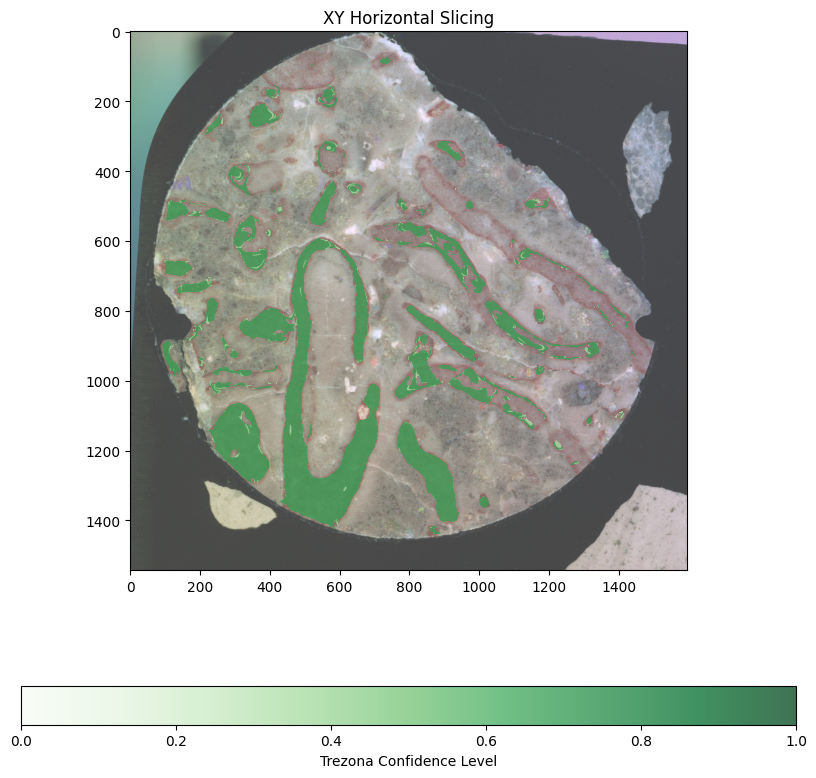

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(fullStack[2], alpha=0.75)
plt.imshow(np.ma.masked_where(xy[2]==0.0, xy[2]), alpha=0.75, cmap='Greens', vmin=0.0, vmax=1.0)
plt.title("XY Horizontal Slicing")
plt.colorbar(orientation="horizontal", label="Trezona Confidence Level", cmap='Greens')


plt.show()

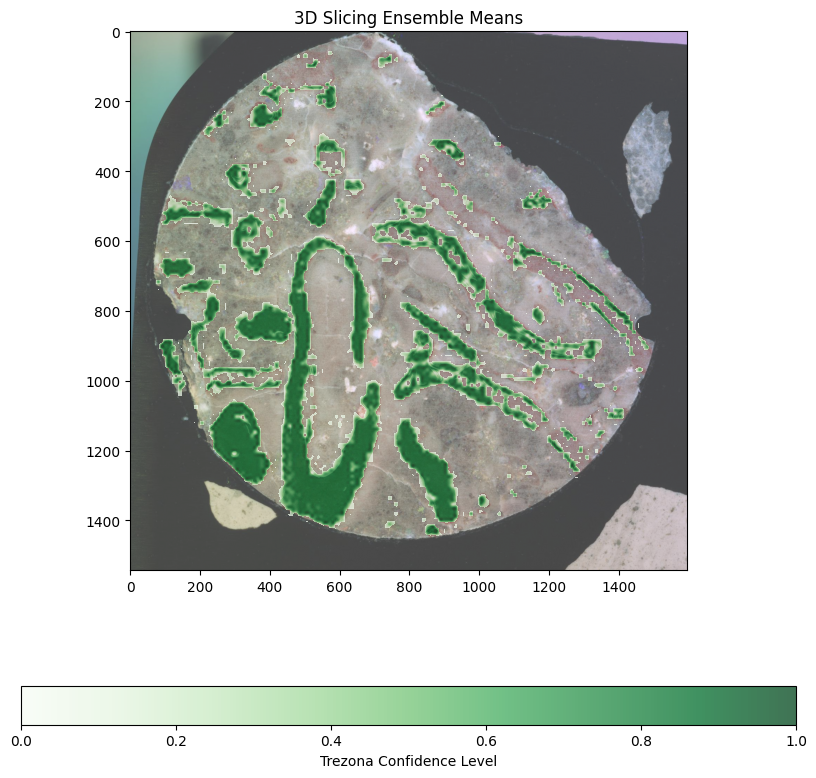

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(fullStack[2], alpha=0.75)
plt.imshow(np.ma.masked_where(stackedPix[2]<0.01, stackedPix[2]), alpha=0.75, cmap='Greens', vmin=0.0, vmax=1.0)
plt.title("3D Slicing Ensemble Means")
plt.colorbar(orientation="horizontal", label="Trezona Confidence Level", cmap='Greens')


plt.show()

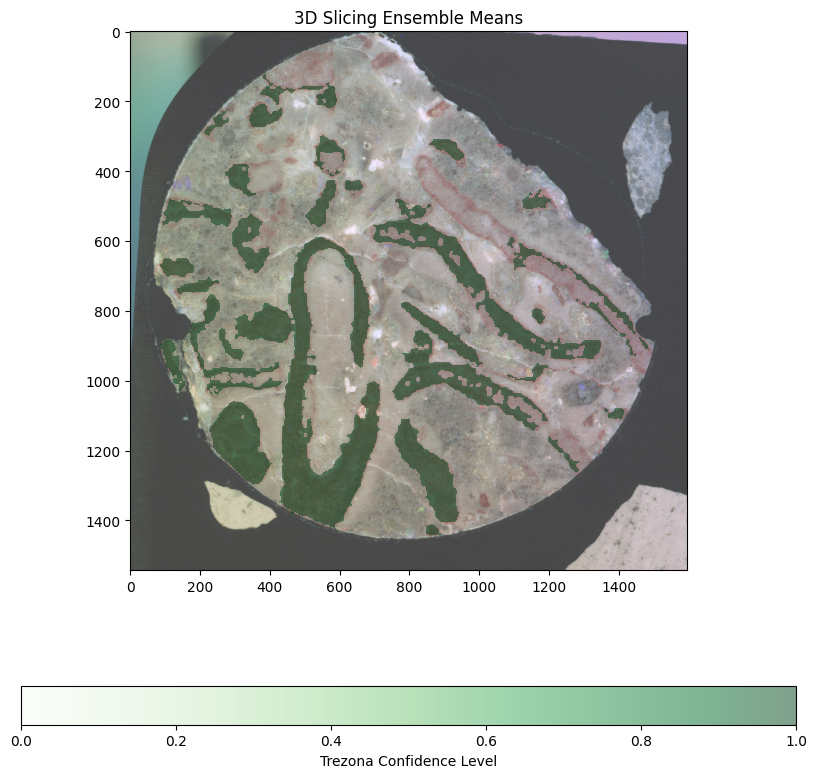

In [34]:
from skimage.morphology import dilation
from skimage.morphology import closing
from skimage.morphology import disk
from skimage.morphology import remove_small_objects

footprint = disk(6)

newPix = np.copy(stackedPix[2])
newPix[newPix > 0.1] = 1
newPix[newPix <= 0.1] = 0
#print(newPix)
newPix = newPix.astype(bool)
#print(newPix)

#testArr = np.reshape(testArr, (1544, 1595))

#dilated = closing(dilation(closing(stackedPix[0], footprint)))
dilated = closing(remove_small_objects(newPix, min_size=1500))
#print(newPix)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(fullStack[2], alpha=0.75)
plt.imshow(np.ma.masked_where(dilated<0.1, dilated), alpha=0.5, cmap='Greens', vmin=0.0, vmax=1.0)
plt.title("3D Slicing Ensemble Means")
plt.colorbar(orientation="horizontal", label="Trezona Confidence Level", cmap='Greens')


plt.show()


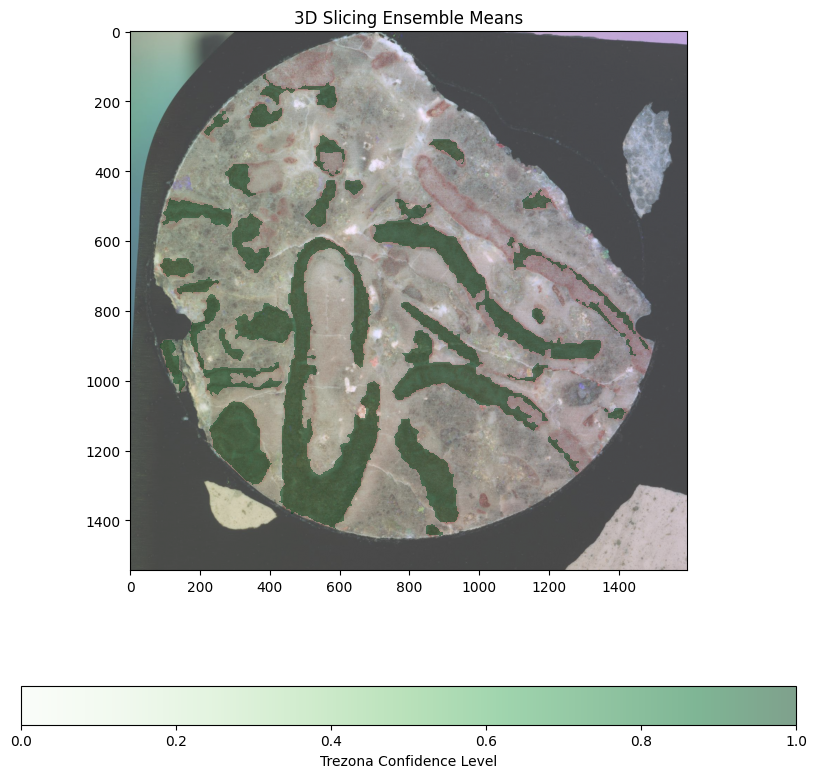

In [35]:
from skimage.morphology import remove_small_holes
holeRemove = remove_small_holes(dilated, area_threshold=1500)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(fullStack[2], alpha=0.75)
plt.imshow(np.ma.masked_where(holeRemove<0.1, holeRemove), alpha=0.5, cmap='Greens', vmin=0.0, vmax=1.0)
plt.title("3D Slicing Ensemble Means")
plt.colorbar(orientation="horizontal", label="Trezona Confidence Level", cmap='Greens')


plt.show()

In [36]:
testAnns = findAnns("Annotations/1654.json", 6)

testAnns[testAnns == 8] = 1.0

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [37]:
# Computing precision/recall
threshold = 0.1


predTrue = stackedPix[2] > threshold
actTrue = testAnns > threshold

tp = np.where(np.logical_and(predTrue == True, actTrue == True))[0]

fp = np.where(np.logical_and(predTrue == True, actTrue == False))[0]

fn = np.where(np.logical_and(predTrue == False, actTrue == True))[0]

tn = np.where(np.logical_and(predTrue == False, actTrue == False))[0]


prec = len(tp) / (len(tp) + len(fp))
rec = len(tp) / (len(tp) + len(fn))

print(prec)
print(rec)

0.831732791760354
0.7668642456369525


In [38]:
print(len(tp))
print(len(fp))
print(len(fn))
print(len(tn))

344013
69597
104584
1944486


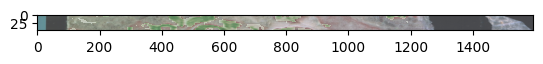

In [39]:
plt.imshow(fullStack[:, 500], alpha=0.75)
plt.imshow(np.ma.masked_where(stackedPix[:, 500]<0.01, stackedPix[:, 500]), alpha=0.5, cmap='Greens', vmin=0.0, vmax=1.0)

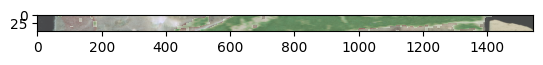

In [40]:
plt.imshow(fullStack[:, :, 500], alpha=0.75)
plt.imshow(np.ma.masked_where(stackedPix[:, :, 500]<0.01, stackedPix[:, :, 500]), alpha=0.5, cmap='Greens', vmin=0.0, vmax=1.0)

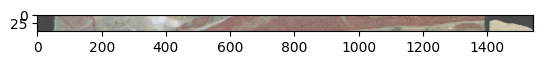

In [41]:
plt.imshow(fullStack[:, :, 500], alpha=0.75)